In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./result-multi-u.csv')

In [4]:
data = data[data['uptime'] > 0]
data

,rrt sampling,prm sampling,field size,num mobiles,num statics,num obstacles,obstacles,trial,uptime,elapsed time
0,1000,100,"[600, 400]",20,0,0,./obstacles.json,#0,674538,0.079820
1,1000,100,"[600, 400]",20,0,0,./obstacles.json,#1,680114,0.064341
2,1000,100,"[600, 400]",20,0,0,./obstacles.json,#2,675994,0.065368
3,1000,100,"[600, 400]",20,0,0,./obstacles.json,#3,659886,0.077192
4,1000,100,"[600, 400]",20,0,0,./obstacles.json,#4,669396,0.107258
...,...,...,...,...,...,...,...,...,...,...
10761,1000,100,"[600, 400]",40,40,40,./obstacles.json,#61,672911,0.443236
10778,1000,100,"[600, 400]",40,40,40,./obstacles.json,#78,631661,0.462088
10787,1000,100,"[600, 400]",40,40,40,./obstacles.json,#87,696400,1.357495
10790,1000,100,"[600, 400]",40,40,40,./obstacles.json,#90,710547,1.218284


In [5]:
data_mean = data.drop(['trial', 'field size'], axis=1).groupby(
  ['num mobiles', 'num statics', 'num obstacles', 'prm sampling'], as_index=False).mean()
data_mean

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
0,20,0,0,100,1000.0,657331.740000,0.079714
1,20,0,5,100,1000.0,637042.333333,0.164596
2,20,0,10,100,1000.0,623486.918367,0.215875
3,20,0,15,100,1000.0,615405.652174,0.252088
4,20,0,20,100,1000.0,611322.300000,0.218613
...,...,...,...,...,...,...,...
103,40,40,20,100,1000.0,703110.788462,1.573385
104,40,40,25,100,1000.0,701669.266667,1.366754
105,40,40,30,100,1000.0,693129.620690,1.127645
106,40,40,35,100,1000.0,699025.000000,1.271739


In [6]:
mean5obs = data_mean.groupby('num obstacles').get_group(5)
mean10obs = data_mean.groupby('num obstacles').get_group(10)

In [7]:
mean5obs

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
1,20,0,5,100,1000.0,637042.333333,0.164596
10,20,20,5,100,1000.0,659705.125000,0.158857
19,20,30,5,100,1000.0,673408.172840,0.167904
28,20,40,5,100,1000.0,667270.056818,0.178745
37,30,0,5,100,1000.0,693801.123596,0.470713
46,30,20,5,100,1000.0,699573.370370,0.547176
55,30,30,5,100,1000.0,702057.937500,0.547791
64,30,40,5,100,1000.0,700145.639535,0.510617
73,40,0,5,100,1000.0,707754.715909,0.967720
82,40,20,5,100,1000.0,707336.333333,0.911091


In [8]:
mean10obs

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
2,20,0,10,100,1000.0,623486.918367,0.215875
11,20,20,10,100,1000.0,652493.520833,0.223668
20,20,30,10,100,1000.0,656582.326923,0.227521
29,20,40,10,100,1000.0,664327.084746,0.243144
38,30,0,10,100,1000.0,691776.483333,0.628974
47,30,20,10,100,1000.0,692814.333333,0.663873
56,30,30,10,100,1000.0,695186.271429,0.688958
65,30,40,10,100,1000.0,697038.397059,0.712310
74,40,0,10,100,1000.0,704607.924242,1.334176
83,40,20,10,100,1000.0,704178.904762,1.198587


In [9]:
mean10obs['uptime'].values.reshape((3, 4))

array([[623486.91836735, 652493.52083333, 656582.32692308,
        664327.08474576],
       [691776.48333333, 692814.33333333, 695186.27142857,
        697038.39705882],
       [704607.92424242, 704178.9047619 , 707164.78688525,
        706278.84722222]])

In [10]:
def plot_uptimes(n_obs):
  data = data_mean.groupby('num obstacles').get_group(n_obs)
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

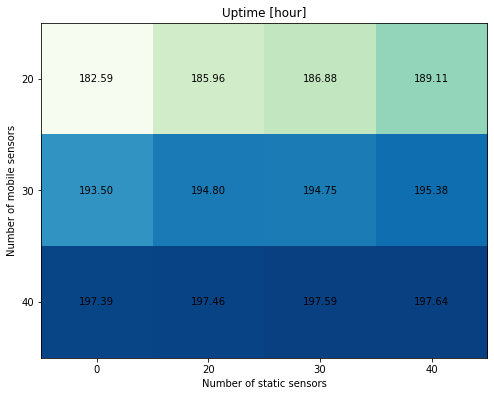

In [11]:

plot_uptimes(0)

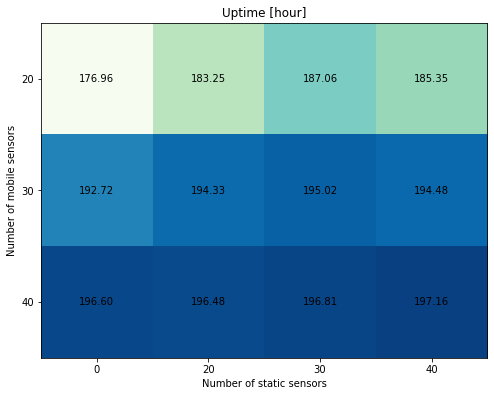

In [12]:
plot_uptimes(5)

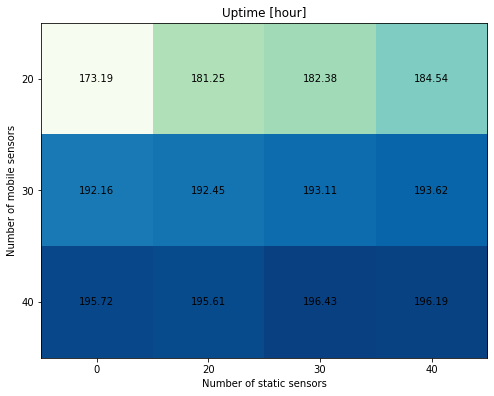

In [13]:
plot_uptimes(10)

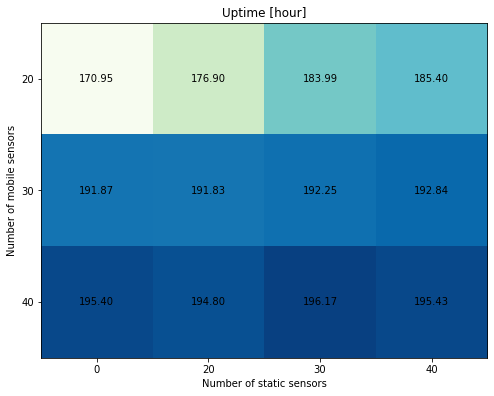

In [14]:
plot_uptimes(15)

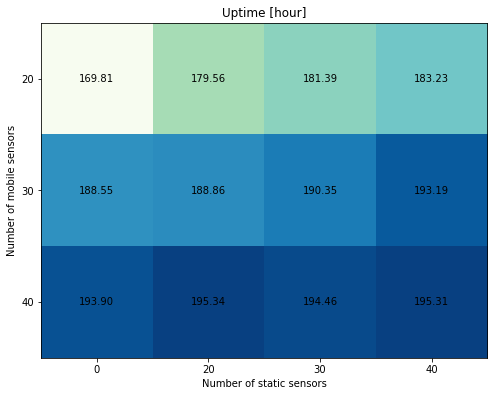

In [15]:

plot_uptimes(20)

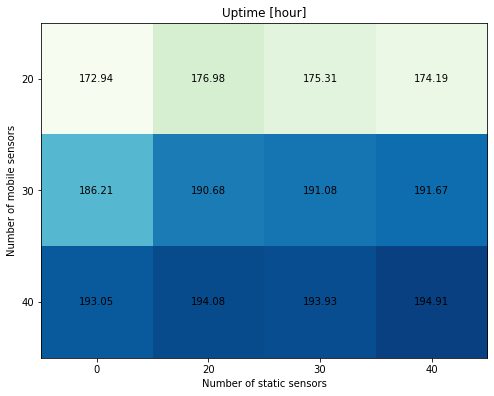

In [16]:

plot_uptimes(25)

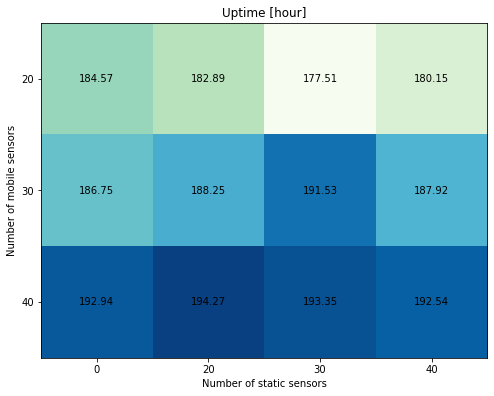

In [17]:
plot_uptimes(30)

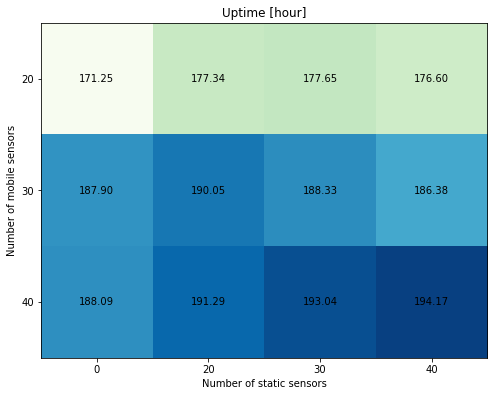

In [18]:

plot_uptimes(35)

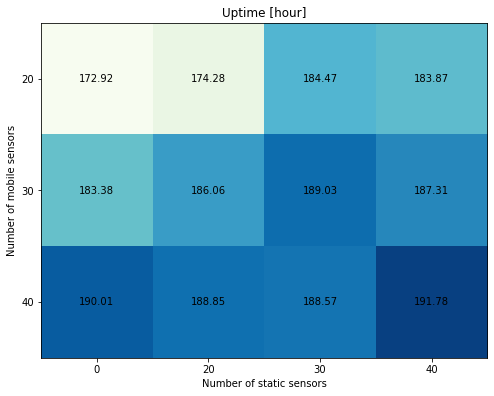

In [19]:

plot_uptimes(40)

In [21]:
data = pd.read_csv('./result-multi-u.csv')
data[data['uptime'] > 0].drop(['elapsed time', 'rrt sampling', 'prm sampling', 'field size', 'obstacles', 'trial'], axis=1).groupby(['num mobiles', 'num statics', 'num obstacles']).count()

uptime
num mobiles num statics num obstacles        
20          0           0                 100
                        5                  69
                        10                 49
                        15                 23
                        20                 10
...                                       ...
40          40          20                 52
                        25                 30
                        30                 29
                        35                 17
                        40                 20

[108 rows x 1 columns]